original here: https://colab.research.google.com/github/arduino/ArduinoTensorFlowLiteTutorials/blob/master/GestureToEmoji/arduino_tinyml_workshop.ipynb


##Variables

In [ ]:
# URL = "https://raw.githubusercontent.com/Plastic-Scanner/data/main/data/20230913_DB2.3_first_dataset_lasercut/measurement.csv"
URL = "https://raw.githubusercontent.com/Plastic-Scanner/data/main/data/20230919_DB2.3_third_dataset_lasercut/measurement.csv"
TooBright = 1.4
TooDark = 0.6

##Setup

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

##Preprocess

In [ ]:
df_raw = pd.read_csv(URL)
df = df_raw.loc[:, :'nm1720'] #drop all later columns
#df

In [ ]:
#make a new dataframe with only the ones that have MeasurementType as "calibration" or PlasticType as "reference"
df_ref = df[(df['MeasurementType'] == 'calibration')]
#df_ref

In [ ]:
PLASTICTYPES = df['PlasticType'].unique()
print(PLASTICTYPES)

['unknown' 'reference' 'PMMA' 'PS' 'PET' 'PC' 'LDPE' 'PP' 'PVC']


In [ ]:
plastics_to_train = ['PMMA','PS','PC','PET']
df['PlasticType'] = df['PlasticType'].apply(lambda x: x if x in plastics_to_train else 'other')

In [ ]:
PLASTICTYPES = df['PlasticType'].unique()
print(PLASTICTYPES)

['other' 'PMMA' 'PS' 'PET' 'PC']


In [ ]:
#make a new dataframe called df_norm that devides the columns from 'nm940' to 'nm1720' of the original dataframe by the mean values of the columns from 'nm940' to 'nm1720' in the df2 dataframe
# while keeping the columns untill 'DateTime' from the original dataframe
df_norm = df
df_norm.loc[:, 'nm940':'nm1720'] = df.loc[:, 'nm940':'nm1720'].div((df_ref.loc[:, 'nm940':'nm1720'].mean()))
#df_norm

In [ ]:
# go through the df_norm dataframe and delete all the rows that have a value that is smaller than "TooDark"value in the column "nm940" and bigger than "TooBright" value in the column "nm940"
df_norm = df_norm[(df_norm['nm940'] < TooBright) & (df_norm['nm940'] > TooDark)]
#df_norm

In [ ]:
#make a new dataframe called df_snv that does and SNV transformation for each of the rows from 'nm940' to 'nm1720' of the df_norm dataframe
# while keeping the columns untill 'DateTime' from the original dataframe
df_snv = df_norm
df_snv.loc[:, 'nm940':'nm1720'] = df_norm.loc[:, 'nm940':'nm1720'].sub(df_norm.loc[:, 'nm940':'nm1720'].mean(axis=1), axis=0).div(df_norm.loc[:, 'nm940':'nm1720'].std(axis=1), axis=0)
#df_snv

In [ ]:
df_snv = df_snv.drop(0, axis=0)

##Train neural network

In [ ]:
print(f"TensorFlow version = {tf.__version__}\n")

# Set a fixed random seed value, for reproducibility, this will allow us to get
# the same random numbers each time the notebook is run
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

# the list of gestures that data is available for
PLASTICTYPES = df_snv['PlasticType'].unique()
NUM_PLASTICTYPES = len(df_snv['PlasticType'].unique())
print(PLASTICTYPES)

# Create empty NumPy arrays
outputs = []
inputs = []

# create a one-hot encoded matrix that is used in the output
ONE_HOT_ENCODED_PLASTICS = np.eye(NUM_PLASTICTYPES)
# Iterate over the DataFrame
for row in df_snv.itertuples():
    # Add the value in the 'PlasticType' column to the outputs array
    #outputs = ONE_HOT_ENCODED_GESTURES[]
    for i in range(NUM_PLASTICTYPES):
      if PLASTICTYPES[i] == row[3]:
        output = ONE_HOT_ENCODED_PLASTICS[i]
    outputs.append(output)
    # Create an array of the values from the column 'nm940' till 'nm1720'
    input_array = row[7:15]

    # Add the array to the input array
    inputs.append(input_array)

print('outputs:', len(outputs))
print('inputs:', len(inputs))
inputs = np.array(inputs)
outputs = np.array(outputs)
print("Data set parsing and preparation complete.")

TensorFlow version = 2.13.0

['other' 'PMMA' 'PS' 'PET' 'PC']
outputs: 79
inputs: 79
Data set parsing and preparation complete.


In [ ]:
df_snv

,Reading,Name,PlasticType,Color,MeasurementType,DateTime,nm940,nm1050,nm1200,nm1300,nm1450,nm1550,nm1650,nm1720
1,1,ref,other,white,regular,2023-09-19 11:48:52.332598,0.329222,-0.352322,-0.816101,0.709973,-1.759258,0.076590,1.559807,0.252089
2,2,ref,other,white,regular,2023-09-19 11:48:53.770032,-0.466399,0.416297,0.160382,0.851503,0.606238,0.397440,0.321376,-2.286837
3,3,ref,other,white,regular,2023-09-19 11:48:55.036030,1.418227,1.113357,-0.367671,-0.083043,-0.693870,0.541886,-0.267452,-1.661434
4,4,ref,other,white,regular,2023-09-19 11:48:56.098023,1.434163,1.210089,0.071553,0.059864,-0.664832,-0.385263,-0.028844,-1.696731
5,5,ref,other,white,regular,2023-09-19 11:48:57.060673,1.360976,1.482465,-0.109105,0.420116,-0.892297,-0.589146,-1.167318,-0.505691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,75,cover pp,other,transparent,regular,2023-09-19 11:56:46.744442,1.048145,1.575791,-1.165614,0.431383,-1.053872,0.030183,0.006866,-0.872883
76,76,pvc zak,other,transparent,regular,2023-09-19 11:57:11.139824,0.648428,0.321821,1.669458,0.579282,-0.985789,-0.261991,-0.555453,-1.415757
77,77,pvc zak,other,transparent,regular,2023-09-19 11:57:12.581186,0.337890,0.378754,1.682097,0.718111,-1.003172,-0.193811,-0.454776,-1.465094
78,78,pvc zak,other,transparent,regular,2023-09-19 11:57:13.886696,0.339517,0.304358,1.758539,0.645041,-1.082087,-0.288844,-0.279761,-1.396763


In [ ]:
# Randomize the order of the inputs, so they can be evenly distributed for training, testing, and validation
# https://stackoverflow.com/a/37710486/2020087
num_inputs = len(inputs)
randomize = np.arange(num_inputs)
np.random.shuffle(randomize)

# Swap the consecutive indexes (0, 1, 2, etc) with the randomized indexes
inputs = inputs[randomize]
outputs = outputs[randomize]

# Split the recordings (group of samples) into three sets: training, testing and validation
TRAIN_SPLIT = int(0.6 * num_inputs)
TEST_SPLIT = int(0.2 * num_inputs + TRAIN_SPLIT)

inputs_train, inputs_test, inputs_validate = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
outputs_train, outputs_test, outputs_validate = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])

print("Data set randomization and splitting complete.")

Data set randomization and splitting complete.


In [ ]:
# build the model and train it
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation='relu')) # relu is used for performance
model.add(tf.keras.layers.Dense(15, activation='relu'))
model.add(tf.keras.layers.Dense(NUM_PLASTICTYPES, activation='softmax')) # softmax is used, because we only expect one gesture to occur per input
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(inputs_train, outputs_train, epochs=200, batch_size=1, validation_data=(inputs_validate, outputs_validate))

Epoch 1/200
47/47 [==============================] - 1s 16ms/step - loss: 0.1603 - mae: 0.3186 - val_loss: 0.1467 - val_mae: 0.3051
Epoch 2/200
47/47 [==============================] - 0s 4ms/step - loss: 0.1417 - mae: 0.2983 - val_loss: 0.1346 - val_mae: 0.2880
Epoch 3/200
47/47 [==============================] - 0s 3ms/step - loss: 0.1252 - mae: 0.2755 - val_loss: 0.1250 - val_mae: 0.2666
Epoch 4/200
47/47 [==============================] - 0s 3ms/step - loss: 0.1123 - mae: 0.2504 - val_loss: 0.1121 - val_mae: 0.2329
Epoch 5/200
47/47 [==============================] - 0s 4ms/step - loss: 0.1015 - mae: 0.2283 - val_loss: 0.1139 - val_mae: 0.2316
Epoch 6/200
47/47 [==============================] - 0s 3ms/step - loss: 0.0917 - mae: 0.2131 - val_loss: 0.1027 - val_mae: 0.1987
Epoch 7/200
47/47 [==============================] - 0s 4ms/step - loss: 0.0818 - mae: 0.1915 - val_loss: 0.0978 - val_mae: 0.2038
Epoch 8/200
47/47 [==============================] - 0s 3ms/step - loss: 0.0728 - 

## Verify

Graph the models performance vs validation.


### Graph the loss

Graph the loss to see when the model stops improving.

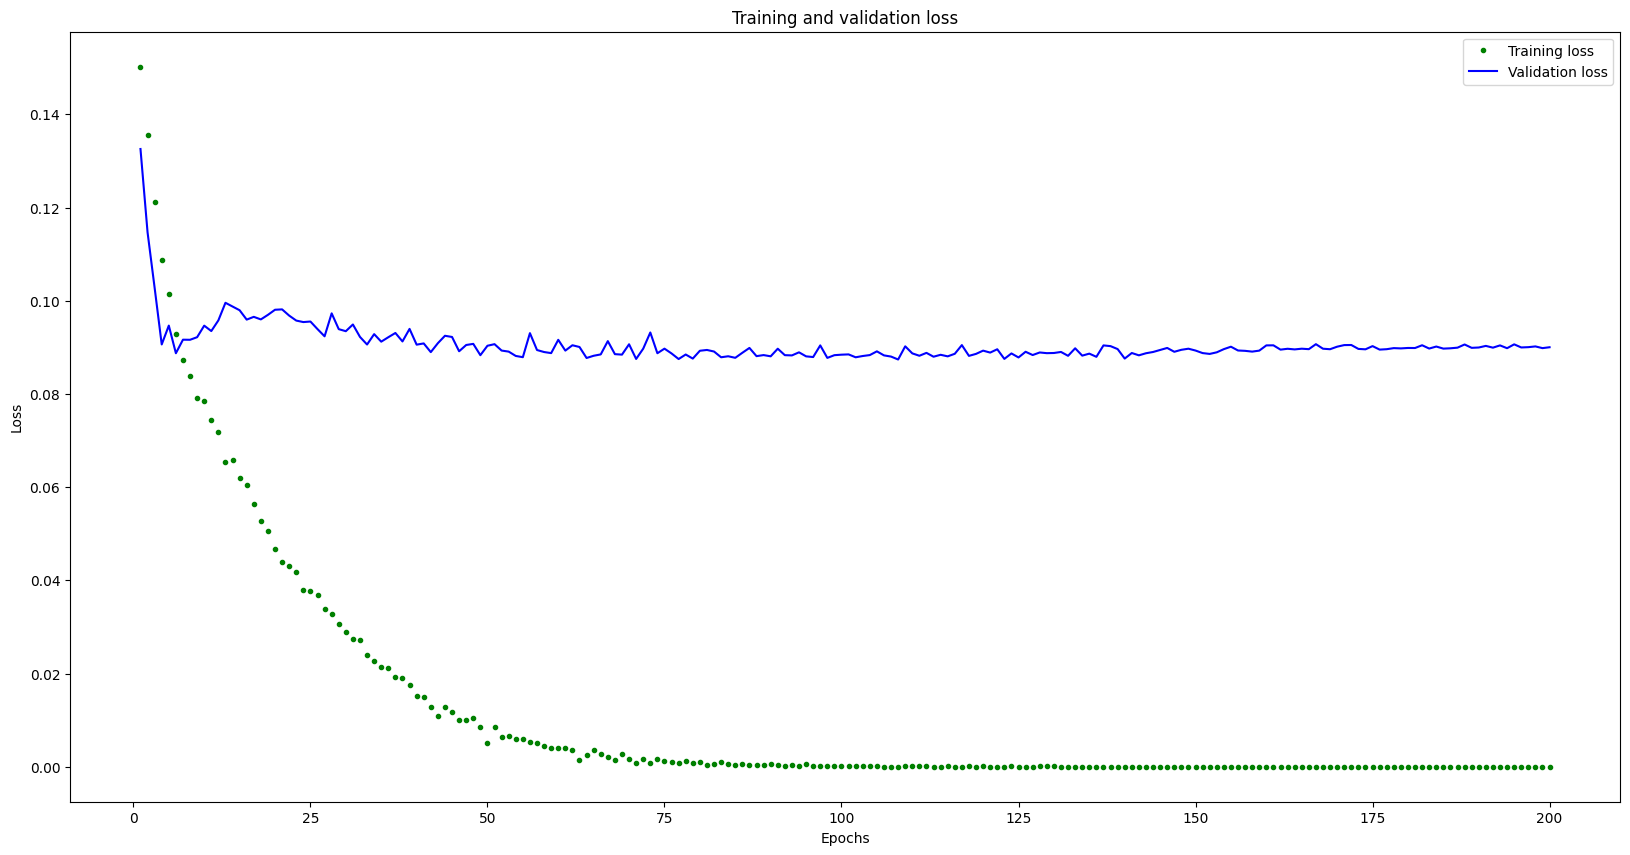

In [ ]:
# increase the size of the graphs. The default size is (6,4).
plt.rcParams["figure.figsize"] = (20,10)

# graph the loss, the model above is configure to use "mean squared error" as the loss function
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print(plt.rcParams["figure.figsize"])

### Graph the loss again, skipping a bit of the start

We'll graph the same data as the previous code cell, but start at index 100 so we can further zoom in once the model starts to converge.

[20.0, 10.0]


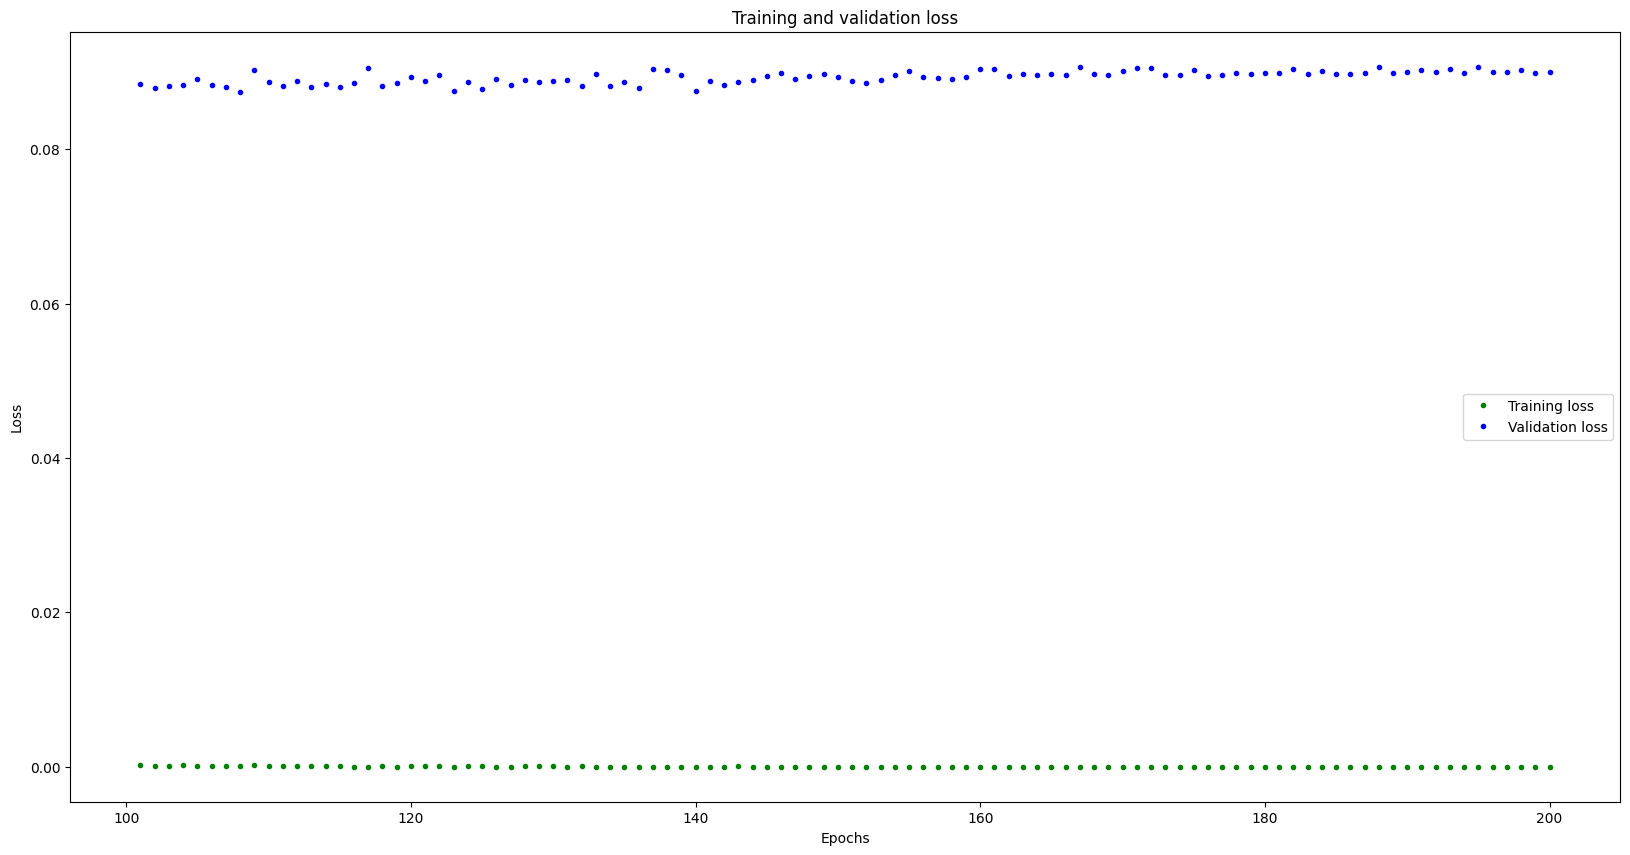

In [ ]:
# graph the loss again skipping a bit of the start
SKIP = 100
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Graph the mean absolute error

[Mean absolute error](https://en.wikipedia.org/wiki/Mean_absolute_error) is another metric to judge the performance of the model.



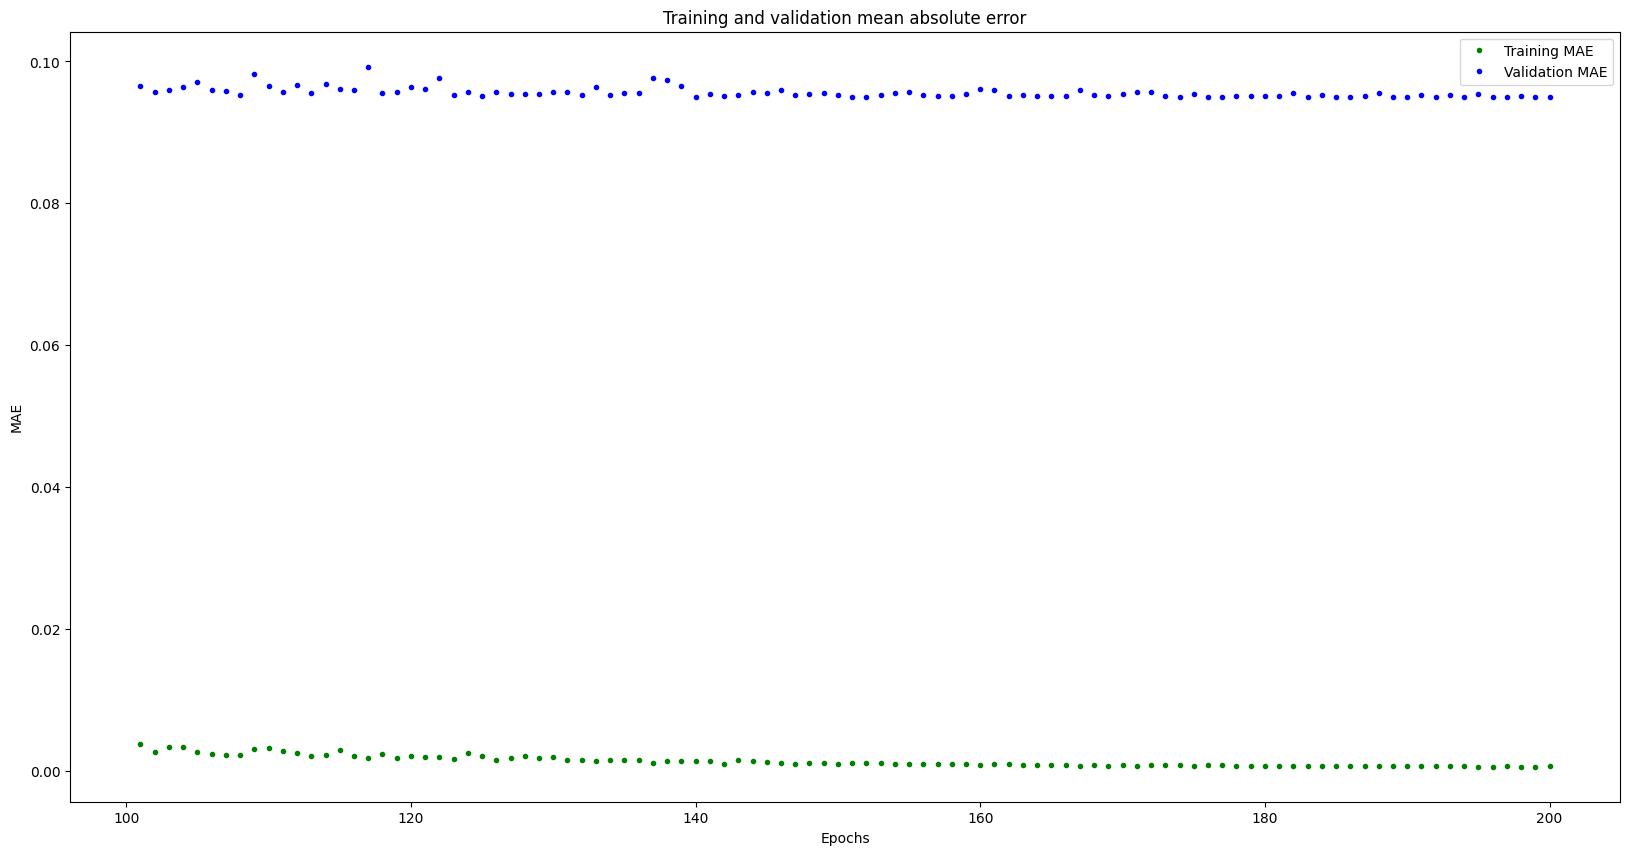

In [ ]:
# graph of mean absolute error
mae = history.history['mae']
val_mae = history.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


### Run with Test Data
Put our test data into the model and plot the predictions


In [ ]:
# use the model to predict the test inputs
predictions = model.predict(inputs_test)

# print the predictions and the expected ouputs
print("predictions =\n", np.round(predictions, decimals=3))
print("actual =\n", outputs_test)

# # Plot the predictions along with to the test data
# plt.clf()
# plt.title('Training data predicted vs actual values')
# #plt.plot(inputs_test, outputs_test, 'b.', label='Actual')
# plt.plot(inputs_test, predictions, 'r.', label='Predicted')
# plt.show()

1/1 [==============================] - 0s 155ms/step
predictions =
 [[0.    0.003 0.989 0.    0.008]
 [0.    0.001 0.996 0.    0.002]
 [0.045 0.955 0.    0.    0.   ]
 [0.    1.    0.    0.    0.   ]
 [0.999 0.    0.    0.    0.001]
 [1.    0.    0.    0.    0.   ]
 [0.    1.    0.    0.    0.   ]
 [0.    1.    0.    0.    0.   ]
 [0.    1.    0.    0.    0.   ]
 [0.999 0.    0.    0.001 0.   ]
 [0.    0.    0.009 0.    0.991]
 [0.    0.    0.    0.006 0.994]
 [0.    0.    0.001 0.    0.998]
 [0.    1.    0.    0.    0.   ]
 [0.    0.    0.033 0.    0.967]]
actual =
 [[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]


## Test with new data

In [ ]:
test_measure = [22977,	36106,	52788,	71216,	27235,	35036,	10490,	6381]
test_calibrate = [26016,	46824,	82300,	80176,	42096,	53390,	19076,	13274]

#normalize
normalized = [0,0,0,0,0,0,0,0]
for i in range(len(test_measure)):
  normalized[i-1] = test_measure[i-1]/test_calibrate[i-1]

#check quality
if normalized[0] > TooBright:
  print("sample too bright")
elif normalized[0] < TooDark:
  print("sampe too dark")

#snv transform
new_list = []
mean = np.mean(normalized)
std = np.std(normalized)
for value in normalized:
  new_value = (value - mean) / std
  new_list.append(new_value)

#predict
predictions = model.predict([new_list])
print("predictions =\n", np.round(predictions, decimals=3))

1/1 [==============================] - 0s 71ms/step
predictions =
 [[0. 1. 0. 0. 0.]]


In [ ]:
print(outputs)

[[0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0.

# Convert the Trained Model to Tensor Flow Lite

The next cell converts the model to TFlite format. The size in bytes of the model is also printed out.

In [ ]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
open("gesture_model.tflite", "wb").write(tflite_model)

import os
basic_model_size = os.path.getsize("gesture_model.tflite")
print("Model is %d bytes" % basic_model_size)



Model is 12684 bytes


## Encode the Model in an Arduino Header File

The next cell creates a constant byte array that contains the TFlite model. Import it as a tab with the sketch below.

In [ ]:
!echo "const unsigned char model[] = {" > /content/model.h
!cat gesture_model.tflite | xxd -i      >> /content/model.h
!echo "};"                              >> /content/model.h

import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")
print("\nOpen the side panel (refresh if needed). Double click model.h to download the file.")

Header file, model.h, is 78,252 bytes.

Open the side panel (refresh if needed). Double click model.h to download the file.


In [ ]:
#https://github.com/arduino/ArduinoTensorFlowLiteTutorials/blob/master/GestureToEmoji/ArduinoSketches/IMU_Classifier/IMU_Classifier.ino